 # This is face emotion recognation module traning 

 This project was made as a part of INSTANT AI course training.  BY : Moaaz Aql 

 Note : this code was written using : 
 
 python 3.11
 
 tensorflow 2.13.0
 
 keras 2.13.1

 scipy 1.11.2

 matplotlib 3.7.2

 

In [55]:
#import the necessary packages
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.models import load_model
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Determine the dimensions of the images and the number of samples
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=64

In [3]:
# train and test data paths
train_data_dir='data/train/'
validation_data_dir='data/test/'

 ### Image Data Augmentation

This process aims to increase the accuracy of the results by createing new images from existing ones To enlarge the size of the training samples.
 

In [4]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [6]:
train_generator = train_data_generator.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            color_mode='grayscale',
                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                            batch_size=batch_size,
                            class_mode='categorical',
                            shuffle=True)

Found 7178 images belonging to 7 classes.


In [8]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [9]:
img, label = train_generator.__next__()

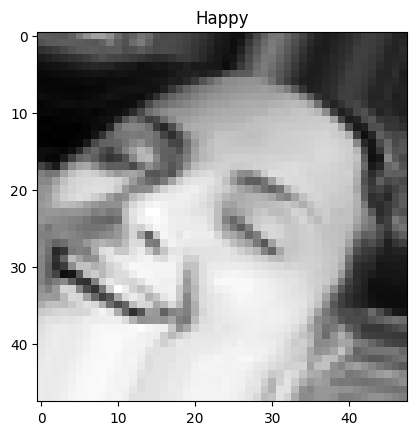

In [11]:
# For testing the final train dataset befor bulding the module 
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [12]:
# Creating the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [13]:
train_path = "data/train/"
test_path = "data/test"

In [14]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [15]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [16]:
epochs=50

In [17]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_model_50epochs.h5')

Epoch 1/50
448/448 [==============================] - 239s 531ms/step - loss: 1.7742 - accuracy: 0.2662 - val_loss: 1.6786 - val_accuracy: 0.3262
Epoch 2/50
448/448 [==============================] - 136s 305ms/step - loss: 1.6487 - accuracy: 0.3460 - val_loss: 1.4748 - val_accuracy: 0.4266
Epoch 3/50
448/448 [==============================] - 136s 303ms/step - loss: 1.5029 - accuracy: 0.4191 - val_loss: 1.3166 - val_accuracy: 0.4922
Epoch 4/50
448/448 [==============================] - 134s 299ms/step - loss: 1.4073 - accuracy: 0.4582 - val_loss: 1.2693 - val_accuracy: 0.5029
Epoch 5/50
448/448 [==============================] - 131s 292ms/step - loss: 1.3490 - accuracy: 0.4829 - val_loss: 1.2176 - val_accuracy: 0.5332
Epoch 6/50
448/448 [==============================] - 130s 291ms/step - loss: 1.3077 - accuracy: 0.4998 - val_loss: 1.1802 - val_accuracy: 0.5481
Epoch 7/50
448/448 [==============================] - 131s 293ms/step - loss: 1.2745 - accuracy: 0.5152 - val_loss: 1.1549 -

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


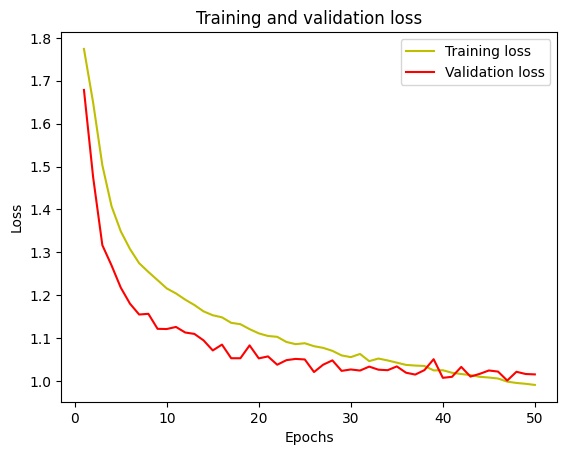

In [18]:
# To Show the loss value through the epochs 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
acc = history.history['accuracy']

In [20]:
val_acc = history.history['val_accuracy']

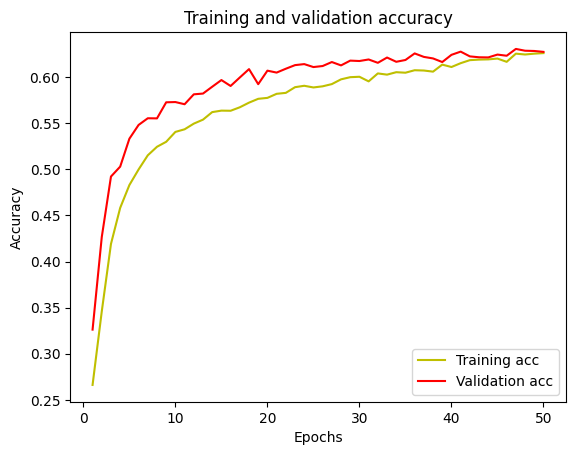

In [21]:
# To Show the accuracy values through the epochs
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
my_model = load_model('emotion_detection_model_50epochs.h5', compile=False)

In [24]:
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

2/2 [==============================] - 0s 29ms/step


In [25]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [27]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.65625


In [29]:
cm = confusion_matrix(test_labels, predictions)

#### Create a Heatmap to show in summary the accuracy of the module in the different categories

<Axes: >

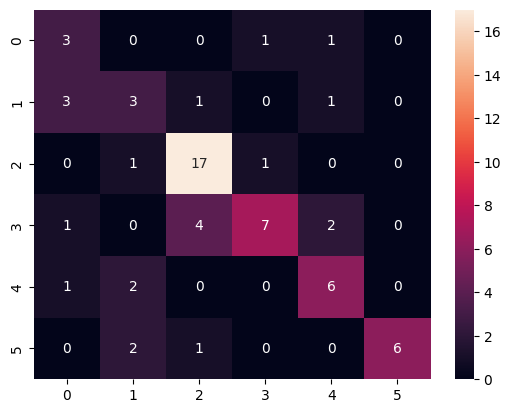

In [32]:
sns.heatmap(cm, annot=True)

In [33]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

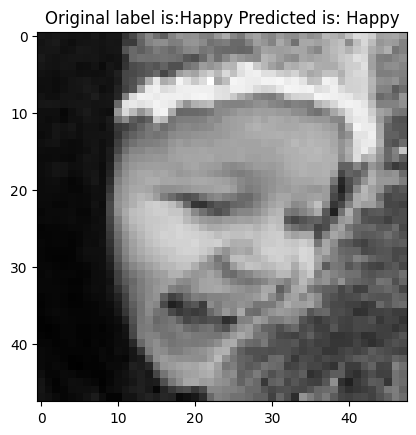

In [54]:
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()